## Python Implementation

In [19]:
!pip install xgboost
import numpy as np                      # importing numpy for mathematical & Scientific Calculation
import pandas as pd                     # importing pandas for data reading and manipulating
import matplotlib.pyplot as plt         # for ploting 
import seaborn as sns                   # for visualization
%matplotlib inline

#import warnings to ignore feature warnings
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing:

In [21]:
# Read data
data = pd.read_csv("Fifa 23 Players Data.csv")

### Handling missing values

In [23]:
data.isnull().sum()

Known As          0
Full Name         0
Overall           0
Potential         0
Value(in Euro)    0
                 ..
RWB Rating        0
LB Rating         0
CB Rating         0
RB Rating         0
GK Rating         0
Length: 89, dtype: int64

No missing values are there so we move forward

In [8]:
#data.fillna(data.mean(), inplace=True) if the column has missing values(< 5%), we will fill them using the mean method

### Separating Categorical and Numerical columns

In [10]:
cat_columns = []                                        # creating a categorical empty list
num_columns = []                                        # creating a Numerical empty list
for i in data.keys() :                                  # using a for loop to iterate over the data set
    if data[i].dtype == 'O' :                           # giving condition for Objective Data Type
        cat_columns.append(i)                           # appending objective columns
    else :
        num_columns.append(i)                            # appending Non-objective columns
        
print('Categorical Columns : \n',cat_columns,'\n')

print("Numerical Columns : \n",num_columns)

Categorical Columns : 
 ['Known As', 'Full Name', 'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Club Name', 'Club Position', 'Contract Until', 'Club Jersey Number', 'On Loan', 'Preferred Foot', 'National Team Name', 'National Team Image Link', 'National Team Position', 'National Team Jersey Number', 'Attacking Work Rate', 'Defensive Work Rate'] 

Numerical Columns : 
 ['Overall', 'Potential', 'Value(in Euro)', 'Age', 'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats', 'Wage(in Euro)', 'Release Clause', 'Joined On', 'Weak Foot Rating', 'Skill Moves', 'International Reputation', 'Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Ag

In [12]:
# Getting the summary statistics for numerical columns
summary_stats = data[num_columns].describe()

summary_stats


,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,18539.000000,18539.000000,1.853900e+04,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,1.853900e+04,...,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,65.852042,71.016668,2.875461e+06,25.240412,181.550839,75.173904,1602.114569,357.946221,8824.537462,5.081688e+06,...,58.451319,57.374076,58.451319,56.281569,55.928583,56.281569,55.650251,54.528184,55.650251,23.257134
std,6.788353,6.192866,7.635129e+06,4.718163,6.858097,7.013593,273.160237,39.628259,19460.531154,1.467203e+07,...,13.987122,13.171194,13.987122,13.903836,13.872190,13.903836,14.159466,14.743929,14.159466,15.108925
min,47.000000,48.000000,0.000000e+00,16.000000,155.000000,49.000000,759.000000,224.000000,0.000000,0.000000e+00,...,18.000000,18.000000,18.000000,17.000000,19.000000,17.000000,17.000000,18.000000,17.000000,10.000000
25%,62.000000,67.000000,4.750000e+05,21.000000,177.000000,70.000000,1470.000000,331.000000,1000.000000,6.650000e+05,...,54.000000,53.000000,54.000000,51.000000,48.000000,51.000000,49.000000,45.000000,49.000000,17.000000
50%,66.000000,71.000000,1.000000e+06,25.000000,182.000000,75.000000,1640.000000,358.000000,3000.000000,1.500000e+06,...,62.000000,60.000000,62.000000,59.000000,59.000000,59.000000,59.000000,58.000000,59.000000,18.000000
75%,70.000000,75.000000,2.000000e+06,29.000000,186.000000,80.000000,1786.000000,385.000000,8000.000000,3.400000e+06,...,67.000000,66.000000,67.000000,66.000000,66.000000,66.000000,65.000000,66.000000,65.000000,20.000000
max,91.000000,95.000000,1.905000e+08,44.000000,206.000000,105.000000,2312.000000,502.000000,450000.000000,3.667000e+08,...,92.000000,91.000000,92.000000,88.000000,89.000000,88.000000,87.000000,90.000000,87.000000,90.000000


### Insight 
Given the large differences in feature ranges (e.g., Wage(in Euro), Value(in Euro), and other numerical features like Overall), normalization would likely work better. This will bring all features into the same scale, making them more comparable.

## Normalization

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Initializing MinMaxScaler for normalization 
scaler = MinMaxScaler()

# Apply normalization to the numerical columns
data[num_columns] = scaler.fit_transform(data[num_columns])

# Verify normalized values
data[num_columns].describe()


,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,...,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,0.428455,0.489716,0.015094,0.330015,0.520605,0.467391,0.542894,0.481821,0.019610,0.013858,...,0.546639,0.539371,0.546639,0.553262,0.527551,0.553262,0.552146,0.507336,0.552146,0.165714
std,0.154281,0.131763,0.040079,0.168506,0.134472,0.125243,0.175892,0.142548,0.043246,0.040011,...,0.189015,0.180427,0.189015,0.195829,0.198174,0.195829,0.202278,0.204777,0.202278,0.188862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340909,0.404255,0.002493,0.178571,0.431373,0.375000,0.457824,0.384892,0.002222,0.001813,...,0.486486,0.479452,0.486486,0.478873,0.414286,0.478873,0.457143,0.375000,0.457143,0.087500
50%,0.431818,0.489362,0.005249,0.321429,0.529412,0.464286,0.567289,0.482014,0.006667,0.004091,...,0.594595,0.575342,0.594595,0.591549,0.571429,0.591549,0.600000,0.555556,0.600000,0.100000
75%,0.522727,0.574468,0.010499,0.464286,0.607843,0.553571,0.661301,0.579137,0.017778,0.009272,...,0.662162,0.657534,0.662162,0.690141,0.671429,0.690141,0.685714,0.666667,0.685714,0.125000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation Matrix to Identify Relationships

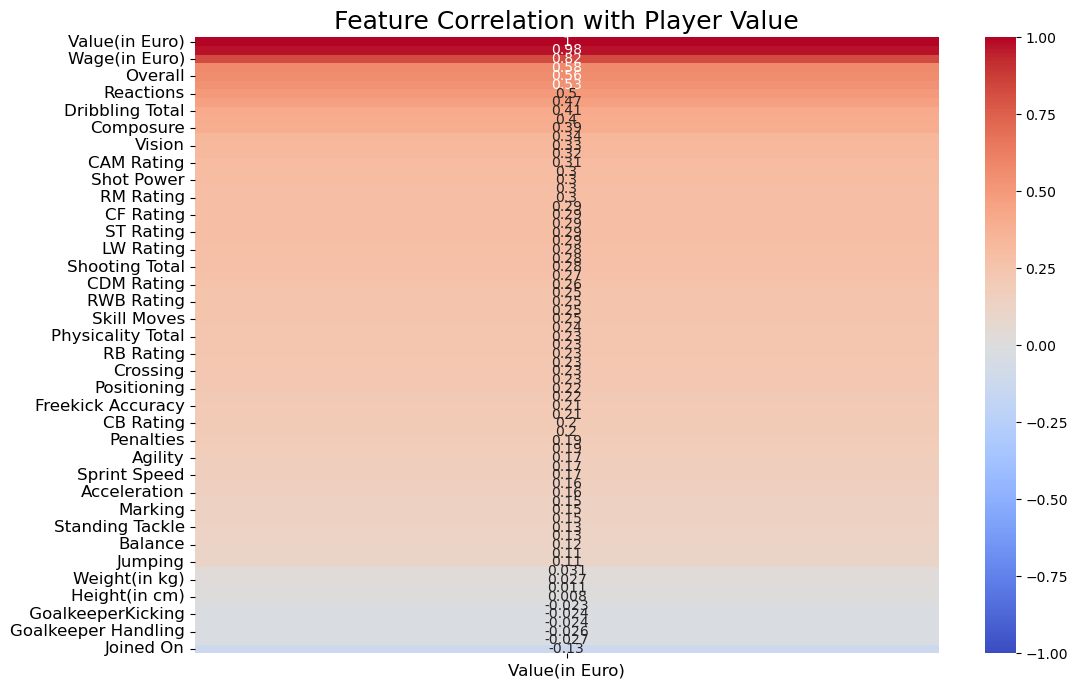

In [41]:
# Compute the correlation matrix
corr_matrix = data[num_columns].corr()

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['Value(in Euro)']].sort_values(by='Value(in Euro)', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation with Player Value", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Dropping Highly Correlated Features

In [49]:
# Defining the correlation threshold(85%)
threshold = 0.85

# Finding highly correlated features
corr_pairs = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
high_corr_pairs = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1.0)]
high_corr_pairs


RW Rating          RM Rating            0.994463
RM Rating          RW Rating            0.994463
                   LW Rating            0.994463
LM Rating          RW Rating            0.994463
LW Rating          RM Rating            0.994463
                                          ...   
CM Rating          Positioning          0.851423
Long Shots         Curve                0.851147
Curve              Long Shots           0.851147
Strength           Physicality Total    0.850633
Physicality Total  Strength             0.850633
Length: 474, dtype: float64

In [51]:
# Get a set of features to drop (first feature from each highly correlated pair)
features_to_drop = set()

for feature1, feature2 in high_corr_pairs.index:
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        # Adding one of the two correlated features to the set of features to drop
        features_to_drop.add(feature2)

# Dropping the highly correlated features from the dataset
X = X.drop(columns=features_to_drop)

# Printing the features that are dropped
print("Dropped features due to high correlation: \n", features_to_drop)


Dropped features due to high correlation: 
 {'Release Clause', 'CM Rating', 'CB Rating', 'Marking', 'RW Rating', 'LF Rating', 'GK Rating', 'LM Rating', 'Dribbling', 'Reactions', 'TotalStats', 'Short Passing', 'BaseStats', 'Long Shots', 'RWB Rating', 'Sliding Tackle', 'LB Rating', 'Goalkeeper Handling', 'Goalkeeper Reflexes', 'Finishing', 'Standing Tackle', 'CF Rating', 'RB Rating', ' GoalkeeperKicking', 'CAM Rating', 'LW Rating', 'RM Rating', 'Acceleration', 'Goalkeeper Diving', 'CDM Rating', 'Interceptions', 'Curve', 'ST Rating', 'Volleys', 'Positioning', 'RF Rating', 'Physicality Total'}


### Train Test split

In [53]:
from sklearn.model_selection import train_test_split

# Defining the feature matrix (X) and target variable (y) again
X = data[num_columns].drop('Value(in Euro)', axis=1)  # All numerical features except the target
y = data['Value(in Euro)']

# Splitting the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Printing the shape of the split datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (12977, 70)
Testing set shape: (5562, 70)


## Model Training


### 1. Random Forest Regressor:

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initializing the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Training the model on the training data
rf_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluating the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print("Random Forest Regressor Results:")
print("Mean Squared Error:", mse_rf)
print("R2 Score:", r2_rf)


Random Forest Regressor Results:
Mean Squared Error: 1.590666673192391e-05
R2 Score: 0.9904143245730695


### 2. XGBoost Regressor:

In [57]:
from xgboost import XGBRegressor

# Initialize the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print evaluation metrics
print("XGBoost Regressor Results:")
print("Mean Squared Error:", mse_xgb)
print("R2 Score:", r2_xgb)


XGBoost Regressor Results:
Mean Squared Error: 3.4215261374183836e-05
R2 Score: 0.9793811993607507
